# Models for J1257 QPO
Notebook to study characteristic frequencies of different QPO models applied to the supermassive black hole 2MASXJ12571076+2724177

Known parameters:
* $M = 10^{6.3} M_\odot$
* $\nu = 3.3 * 10^{-5}$ HZ
* $d = 90$ Mpc

let's look for a range of frequencies and masses around these parameters

### General settings

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
#let's set the parameters
M_bh = 10**6.3
nu0 = 3.3*10**(-5)

# Physical constants
G = 6.67430e-11       # m^3 kg^-1 s^-2
c = 299792458         # m/s
Msun = 1.98847e30     # kg

Rg_sun = G * Msun / c**2  # in m

In [62]:
#let's set the tolerance for the target frequency
tol = 0.01 * nu0  # 1% tolerance
target_min = 1e-5
target_max = 1e-4

### Useful functions for eery model

In [63]:
# Kerr frequencies in Hz
# i compute Rg separating M because I'll may try some different value
def nu_phi(r, a, M):
    # r in units of GM/c^2, a dimensionless (0–1), M in solar masses
    M_kg = M * Msun
    Rg = Rg_sun * M  # in cm
    if a==0:
        return c / (2 * np.pi * Rg * r**1.5)
    return abs(a)/a * c / (Rg*(r**1.5 + abs(a)))

def nu_theta(r, a, M):
    vphi = nu_phi(r, a, M)
    factor = np.sqrt(1 - (4*abs(a))/r**1.5 + (3*a**2)/r**2)
    return vphi * factor

def nu_r(r, a, M):
    vphi = nu_phi(r, a, M)
    factor = np.sqrt(1 - (6)/r + (8*abs(a))/r**1.5 - (3*a**2)/r**2)
    return vphi * factor

In [64]:
# Kerr ISCO radius
def r_isco(a):
    if a==0:
        return 6
    Z1 = 1 + (1 - a**2)**(1/3) * ((1 + a)**(1/3) + (1 - a)**(1/3))
    Z2 = np.sqrt(3*a**2 + Z1**2)
    return 3 + Z2 - abs(a)/a*np.sqrt((3 - Z1)*(3 + Z1 + 2*Z2))

In [65]:
#function to find the matching combinations

def find_match(a_range, r_ranges, M, model):
    matches = []
    for i, a in enumerate(a_range):
        for r in r_ranges[i]:
            freq = model(r, a, M_bh)
            if abs(freq - nu0) < tol:
                matches.append((a, r, freq))
    return matches

def stampa(matches):
    print(f"Found {len(matches)} matches:")
    for m in matches:
        print(f"a={m[0]}, r={m[1]} R_g → ν_LT={m[2]} Hz")

In [80]:
#functions for plots

def select(a_match, N=10):
    a_match = np.array(a_match)
    # Sample a few spin values for clarity
    n_pick = 10
    idx = np.linspace(0, len(a_match)-1, n_pick).astype(int)
    a_sampled = a_match[idx]
    return a_sampled

def plot_nu_vs_r(a_sampled, M, nu0, target_min, target_max, label, title, model):
    plt.figure(figsize=(9,6))

    for a in a_sampled:
        r_grid = np.linspace(r_isco(a), 1e4, 800)
        freq = np.array([model(r, a, M) for r in r_grid])
        plt.plot(r_grid, freq, label=f"a = {a:.5f}")
        
    # Target frequency band
    plt.fill_between(r_grid, target_min, target_max, color='gray', alpha=0.2,
                    label="Target range")
    plt.plot(r_grid, np.ones_like(r_grid)*nu0, label="Target frequency")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("r  [GM/c²]")
    plt.ylabel(label)
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


### FIRST MODEL - RELATIVISTIC PRECESSION

in this model the QPO frequency is generally identified with the Lense-Thirring precesion around a spinning compact object.
alternatively, also the periastreon precession frequency or the rotation frequency can be associated with it.

in any case, the frequencies will only depend on three parameters: the mass of the objecy, its spin, and distance from the central object

In [67]:
# lense-thirring precession frequency
def nu_LT(r, a, M):
    return nu_phi(r, a, M) - nu_theta(r, a, M)

#periastron precession frequency
def nu_per(r, a, M):
    return nu_phi(r, a, M) - nu_r(r, a, M)

In [68]:
# set parameters range
a_range = np.linspace(-0.999, 0.999, 10001)  # Spins
r_ranges = [np.exp(np.linspace(np.log(r_isco(a)), np.log(1e4), 800)) for a in a_range]

#the linear span semms to produce different results...
#r_ranges = [np.arange(r_isco(a), 1e4, 800) for a in a_range]     # Radii in GM/c^2

#### Let's start by considering the fixed mass given above

##### first, LT precession

In [77]:
#let's look for all the matching combinations of parameters
LT_matches = find_match(a_range, r_ranges, M_bh, nu_LT)
# Print results
stampa(LT_matches)

Found 3344 matches:
a=0.03316679999999994, r=5.8912425675858895 R_g → ν_LT=3.2671618256641805e-05 Hz
a=0.033366600000000024, r=5.8905847197261 R_g → ν_LT=3.287737312999365e-05 Hz
a=0.03356640000000011, r=5.889926839177671 R_g → ν_LT=3.308323887825631e-05 Hz
a=0.03376619999999997, r=5.889268925930305 R_g → ν_LT=3.328921557219089e-05 Hz
a=0.034165800000000135, r=5.943016452572878 R_g → ν_LT=3.2775026694154344e-05 Hz
a=0.034365599999999996, r=5.942353118720086 R_g → ν_LT=3.297566106004717e-05 Hz
a=0.03456540000000008, r=5.9416897517696885 R_g → ν_LT=3.3176403549496115e-05 Hz
a=0.03516480000000011, r=5.99525102463633 R_g → ν_LT=3.2850639097101696e-05 Hz
a=0.03536459999999997, r=5.994582158935888 R_g → ν_LT=3.3046280109418416e-05 Hz
a=0.03556440000000005, r=5.993913259724159 R_g → ν_LT=3.324202656190302e-05 Hz
a=0.035963999999999996, r=6.048624847625499 R_g → ν_LT=3.2709169155676135e-05 Hz
a=0.03616380000000008, r=6.047950437758938 R_g → ν_LT=3.28998380552583e-05 Hz
a=0.03636359999999994, r

alreay here i see the frequncy measyred can be accounted for considering a prograde spinning hole of whatevere spin, with a radius betweeen 5 and 17 Rg

In [ ]:
a_match, r_match, freq_match = zip(*LT_matches) if LT_matches else ([], [], [])
print(min(a_match), max(a_match))
print(min(r_match), max(r_match))

0.03316679999999994 0.999
5.889268925930305 17.185971073767664


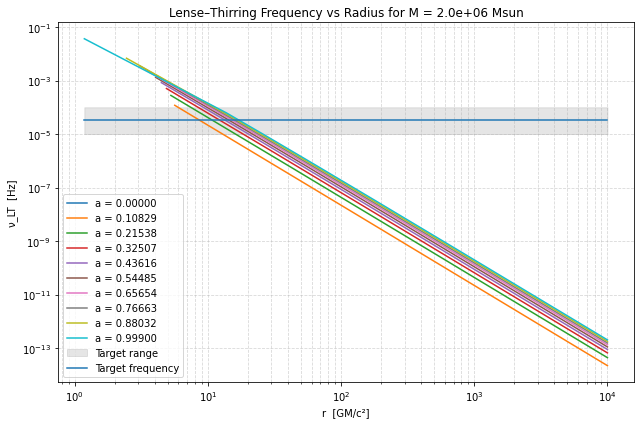

In [81]:
# -----------------------------
# PLOT 1: ν_LT(r) FOR DIFFERENT SPINS
# -----------------------------
a_selected = select(a_match, 10)
title = f"Lense–Thirring Frequency vs Radius for M = {M_bh:.1e} Msun"
label = "ν_LT  [Hz]"
plot_nu_vs_r(a_selected, M_bh, nu0, target_min, target_max, label, title, nu_LT)


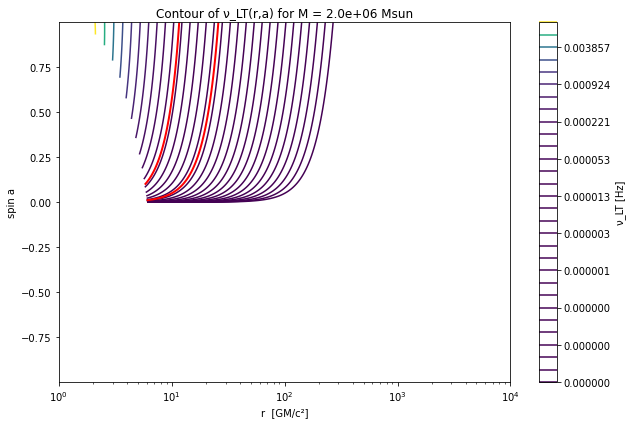

In [72]:
# -----------------------------
# PLOT 2: CONTOUR (r,a) → ν_LT
# -----------------------------
# Finer parameter grids
a_grid = np.linspace(-0.999, 0.999, 400)
r_grid2 = np.exp(np.linspace(np.log(1), np.log(1e4), 500))

A, R = np.meshgrid(a_grid, r_grid2)

# Compute ISCO for each spin
isco_vals = np.array([r_isco(a) for a in a_grid])   # 1D, length = len(a_grid)

# Prepare empty frequency grid
freq_grid = np.zeros((len(r_grid2), len(a_grid)))   # 2D array

# Fill manually (non-vectorized loops)
for j, a in enumerate(a_grid):
    r_isco_current = isco_vals[j]
    for i, r in enumerate(r_grid2):
        if r < r_isco_current:
            freq_grid[i, j] = np.nan   # mask later
        else:
            freq_grid[i, j] = nu_LT(r, a, M_bh)   # safe, scalar-by-scalar
freq_grid = np.ma.masked_invalid(freq_grid)

plt.figure(figsize=(9,6))
levels = np.logspace(-8, -2, 30)

cs = plt.contour(R, A, freq_grid, levels=levels, cmap="viridis")

# Highlight target band
plt.contour(R, A, freq_grid, levels=[target_min], colors='red', linewidths=2)
plt.contour(R, A, freq_grid, levels=[target_max], colors='red', linewidths=2)

plt.xscale("log")
plt.xlabel("r  [GM/c²]")
plt.ylabel("spin a")
plt.title(f"Contour of ν_LT(r,a) for M = {M_bh:.1e} Msun")
plt.colorbar(cs, label="ν_LT [Hz]")
plt.tight_layout()
plt.show()


##### second, periastron precession

In [78]:
#let's look for all the matching combinations of parameters
per_matches = find_match(a_range, r_ranges, M_bh, nu_per)
stampa(per_matches)

/tmp/ipykernel_9673/3912781103.py:18: RuntimeWarning: invalid value encountered in sqrt
  factor = np.sqrt(1 - (6)/r + (8*abs(a))/r**1.5 - (3*a**2)/r**2)


Found 4107 matches:
a=0.0, r=19.151163870529665 R_g → ν_LT=3.310427966501486e-05 Hz
a=0.00019979999999997222, r=39.14271395320259 R_g → ν_LT=3.3166656249545646e-05 Hz
a=0.00039960000000005547, r=39.13953253111776 R_g → ν_LT=3.317201241617479e-05 Hz
a=0.0005994000000000277, r=39.136350870053036 R_g → ν_LT=3.317737036912481e-05 Hz
a=0.0007991999999999999, r=39.13316896995719 R_g → ν_LT=3.318273010926464e-05 Hz
a=0.0009989999999999721, r=39.12998683076705 R_g → ν_LT=3.3188091637489665e-05 Hz
a=0.0011987999999999444, r=39.126804452394225 R_g → ν_LT=3.3193454954750026e-05 Hz
a=0.0013986000000000276, r=39.123621834774276 R_g → ν_LT=3.3198820061944745e-05 Hz
a=0.0015984000000001108, r=39.12043897783941 R_g → ν_LT=3.3204186959980865e-05 Hz
a=0.001798199999999972, r=39.11725588151359 R_g → ν_LT=3.3209555649783536e-05 Hz
a=0.0019980000000000553, r=39.11407254573063 R_g → ν_LT=3.321492613225736e-05 Hz
a=0.0021977999999999165, r=39.110888970420575 R_g → ν_LT=3.322029840831546e-05 Hz
a=0.0023975999

here i see the frequncy measured can be accounted for considering a prograde spinning hole of whatever spin, with a radius betweeen 35 and 40 Rg

In [ ]:
a_match, r_match, freq_match = zip(*per_matches) if per_matches else ([], [], [])
print(min(a_match), max(a_match))
print(min(r_match), max(r_match))

0.0 0.999
19.151163870529665 39.33760803098217


/tmp/ipykernel_9673/3912781103.py:18: RuntimeWarning: invalid value encountered in sqrt
  factor = np.sqrt(1 - (6)/r + (8*abs(a))/r**1.5 - (3*a**2)/r**2)


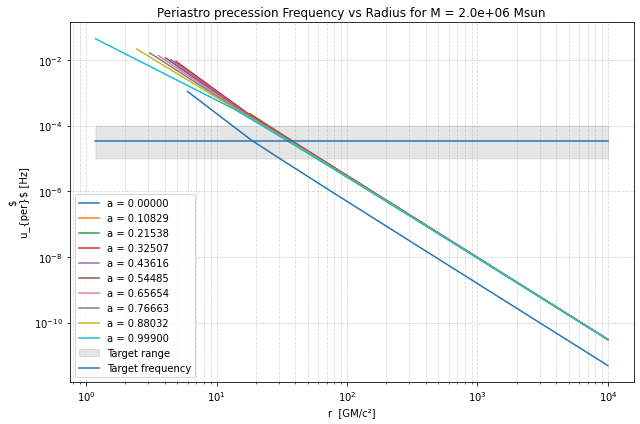

In [82]:
# -----------------------------
# PLOT 1: ν_per(r) FOR DIFFERENT SPINS
# -----------------------------
a_selected = select(a_match, 10)
title = f"Periastro precession Frequency vs Radius for M = {M_bh:.1e} Msun"
label = "$\nu_{per}$ [Hz]"
plot_nu_vs_r(a_selected, M_bh, nu0, target_min, target_max, label, title, nu_per)

##### third, rotation frequency

In [83]:
#let's look for all the matching combinations of parameters
phi_matches = find_match(a_range, r_ranges, M_bh, nu_phi)
stampa(phi_matches)

Found 6796 matches:
a=0.0, r=62.27357482668991 R_g → ν_LT=3.29535174429264e-05 Hz
a=0.00019979999999997222, r=212.1043836259289 R_g → ν_LT=3.293918484756335e-05 Hz
a=0.00039960000000005547, r=212.09239969911891 R_g → ν_LT=3.29419745163836e-05 Hz
a=0.0005994000000000277, r=212.08041457510873 R_g → ν_LT=3.294476485783562e-05 Hz
a=0.0007991999999999999, r=212.06842825360687 R_g → ν_LT=3.294755587218321e-05 Hz
a=0.0009989999999999721, r=212.0564407342769 R_g → ν_LT=3.2950347559700815e-05 Hz
a=0.0011987999999999444, r=212.0444520166872 R_g → ν_LT=3.2953139920685154e-05 Hz
a=0.0013986000000000276, r=212.03246210049653 R_g → ν_LT=3.295593295541202e-05 Hz
a=0.0015984000000001108, r=212.020470985351 R_g → ν_LT=3.2958726664160294e-05 Hz
a=0.001798199999999972, r=212.0084786708653 R_g → ν_LT=3.2961521047216303e-05 Hz
a=0.0019980000000000553, r=211.99648515669145 R_g → ν_LT=3.296431610485778e-05 Hz
a=0.0021977999999999165, r=211.9844904424669 R_g → ν_LT=3.296711183736599e-05 Hz
a=0.002397599999999

in this case we still see that only prograde spinning holes can explain the frequency, and whatever spin, the radius is alwas around 212 Rg, unless it is not spinning at all, in which case the radius is 67 Rg

In both casesm it's way bigger than the values for the other frequencies, and this is obvious since from the formulas above, this is the biggest frequency once the radius is fixed

In [84]:
a_match, r_match, freq_match = zip(*phi_matches) if phi_matches else ([], [], [])
print(min(a_match), max(a_match))
print(min(r_match), max(r_match))

0.0 0.999
62.27357482668991 213.26514014433027


/tmp/ipykernel_9673/2183838154.py:31: UserWarning: Glyph 11 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


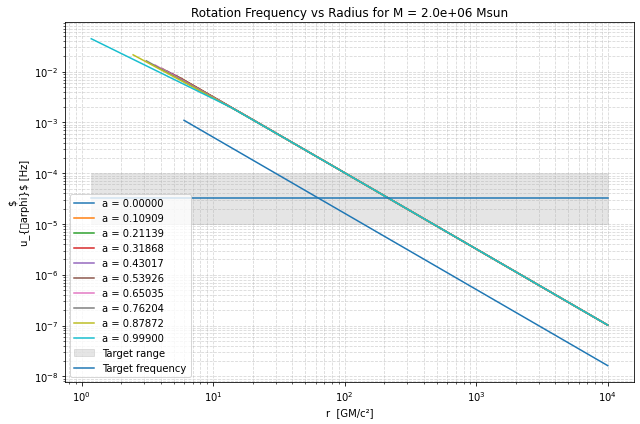

In [85]:
# Plot ν_phi(r) for different spins
a_selected = select(a_match, 10)
title = f"Rotation Frequency vs Radius for M = {M_bh:.1e} Msun"
label = "$\nu_{\varphi}$ [Hz]"
plot_nu_vs_r(a_selected, M_bh, nu0, target_min, target_max, label, title, nu_phi)

#### now let's study varying masses in the range 6-7

### SECOND MODEL: INNER PRECESSING FLOW

#### fixed mass

#### varying mass